In [44]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

### CIFAR10 DataSets Loading 2steps

#### DataLoading 1step

In [45]:
train_dataset = torchvision.datasets.CIFAR10(root='../../down/', # 물리적 위치 지정. zip파일 형태!!(중요~!!나중에 custom 데이터할 때 알게될것이다~)
                                             train=True, # train 데이터라는 것, train, test 나눠져 있다는 것을 알 수 있다.
                                             transform=transforms.ToTensor(), 
                                             # 1. Scaling이 진행됨. 255로 나눠줌
                                             # 2. Tensor 타입으로 바꿔줌. torch 데이터 타입
                                             # 3. 채널 값을 앞으로 보낸다. 그러므로 이미지 작업 시 채널을 뒤로 보내야함
                                             download=True)

Files already downloaded and verified


In [75]:
# 다운받은 데이터를 일단 실제로 출력
# train 데이터는 픽셀 값이랑 label이 제공됨
print(train_dataset[0][0])

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [47]:
image, label = train_dataset[0]
image
label

6

In [48]:
print(image.shape) # 32x32x3

torch.Size([3, 32, 32])


In [49]:
# ToTensor 특징3. 채널 값을 앞으로 보낸다
# 그러므로 이미지 작업 시 채널을 뒤로 보내야함
print(image.size())

torch.Size([3, 32, 32])


In [50]:
# 받아온 데이터는 tensor 배열이기 때문에 이미지로 출력하기 위해
# np.array()로 바꿔줘야 한다.
image = image.numpy()
image

# im : image로 보이겠다. 
# plt.imshow(image) # 에러 발생!! 채널이 앞부분에 있기 때문에

array([[[0.23137255, 0.16862746, 0.19607843, ..., 0.61960787,
         0.59607846, 0.5803922 ],
        [0.0627451 , 0.        , 0.07058824, ..., 0.48235294,
         0.46666667, 0.47843137],
        [0.09803922, 0.0627451 , 0.19215687, ..., 0.4627451 ,
         0.47058824, 0.42745098],
        ...,
        [0.8156863 , 0.7882353 , 0.7764706 , ..., 0.627451  ,
         0.21960784, 0.20784314],
        [0.7058824 , 0.6784314 , 0.7294118 , ..., 0.72156864,
         0.38039216, 0.3254902 ],
        [0.69411767, 0.65882355, 0.7019608 , ..., 0.84705883,
         0.5921569 , 0.48235294]],

       [[0.24313726, 0.18039216, 0.1882353 , ..., 0.5176471 ,
         0.49019608, 0.4862745 ],
        [0.07843138, 0.        , 0.03137255, ..., 0.34509805,
         0.3254902 , 0.34117648],
        [0.09411765, 0.02745098, 0.10588235, ..., 0.32941177,
         0.32941177, 0.28627452],
        ...,
        [0.6666667 , 0.6       , 0.6313726 , ..., 0.52156866,
         0.12156863, 0.13333334],
        [0.5

In [51]:
# numpy.moveaxis()
image = np.moveaxis(image, 0, -1) # 맨 앞(0)에 있는 것을 맨 뒤로(-1)
print(image.shape)

(32, 32, 3)


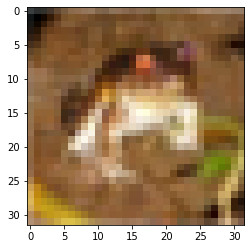

In [52]:
plt.imshow(image) # 저해상도...나중에 우리가 실제로 쓰는 이미지는 고해상도...작업하기 어렵고...acc..toydata 편리하게 쓸수 있는 데이터

### DataLoading 2step
- 5만장을 한번에 model에 집어넣을 컴퓨터 사양은 없으므로 한번엔 못함.
- 이때 batch_size로 쪼개서 model에 넣는다.

In [53]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, # model에 몇개씩 load할 것인지 지정
                                           shuffle=True) # Data Augmentation

In [54]:
cnt = 0

# for 문 몇번? 5만 / 64 = 781.xxx가 나오는데...781번? 782번? ...실행?
for images, labels in train_loader: 
    '''
    실제로 모델 정의...loss, optimization 선정의
    예측하고
    loss
    optimization 초기화 zero_grad()
    backward()
    step()..학습을 진행
    '''
    cnt += 1

# torch.utils.data.DataLoader 검색
# drop_last=False 이기 때문에 버리지 않고 초과해서 반복
print(cnt)

782


### CIFAR10 데이터 로드 중요 과정.png 참고